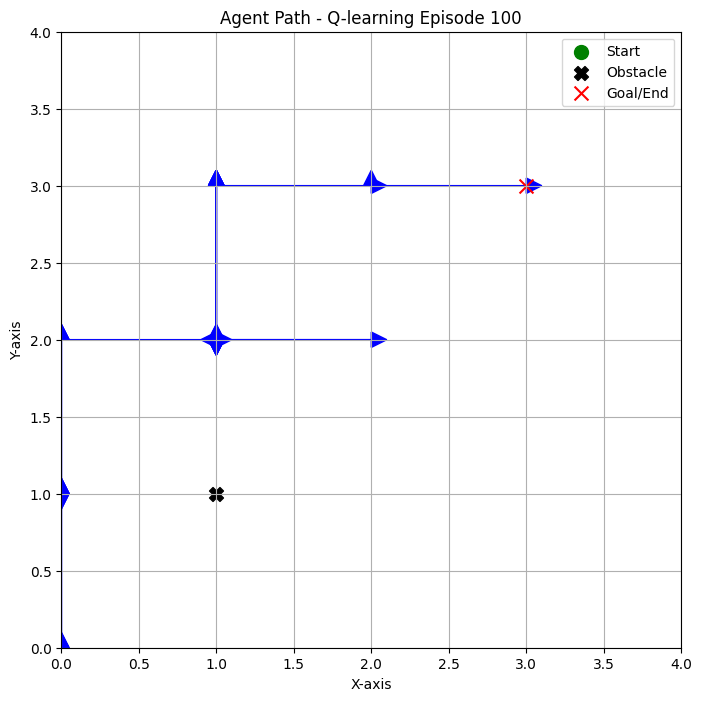

Episode: 100, Avg. Reward: -28.32, Epsilon: 0.9047921471137096


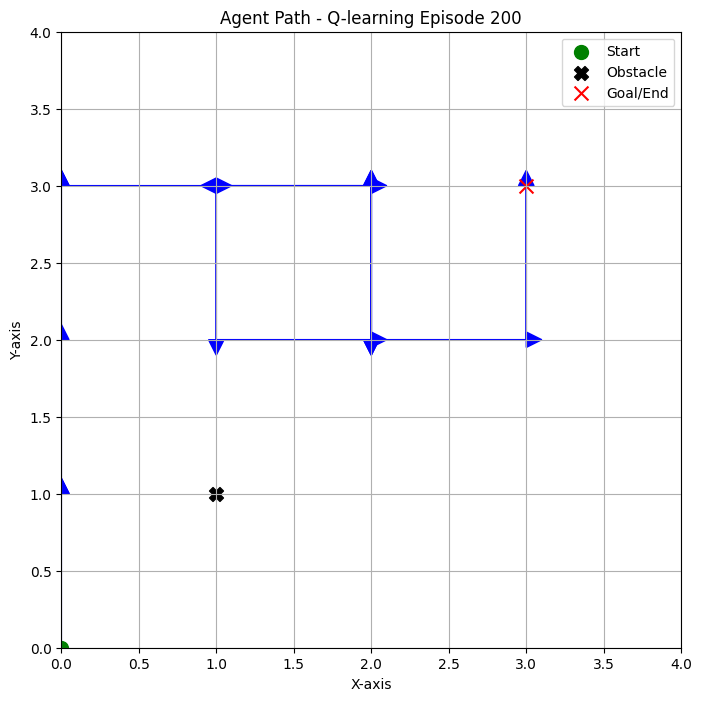

Episode: 200, Avg. Reward: -10.64, Epsilon: 0.818648829478636


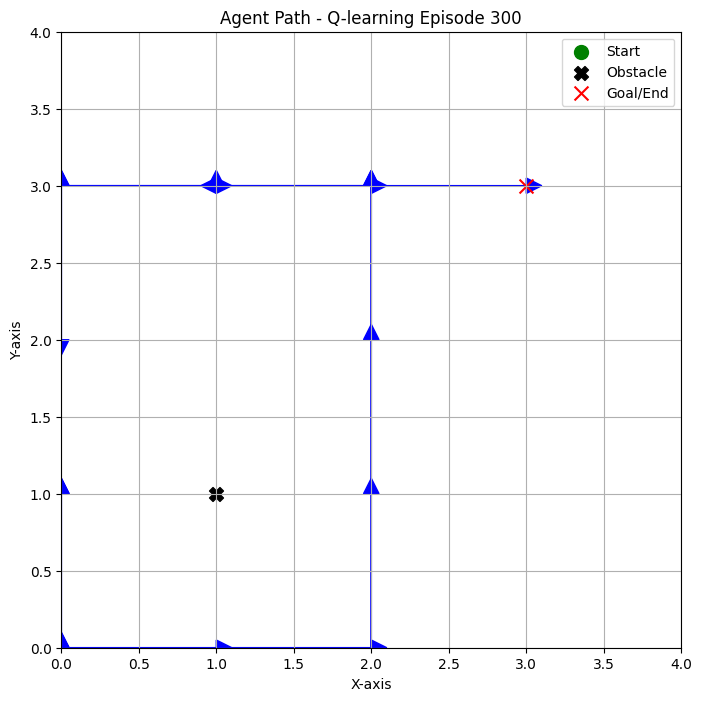

Episode: 300, Avg. Reward: 10.26, Epsilon: 0.7407070321560997


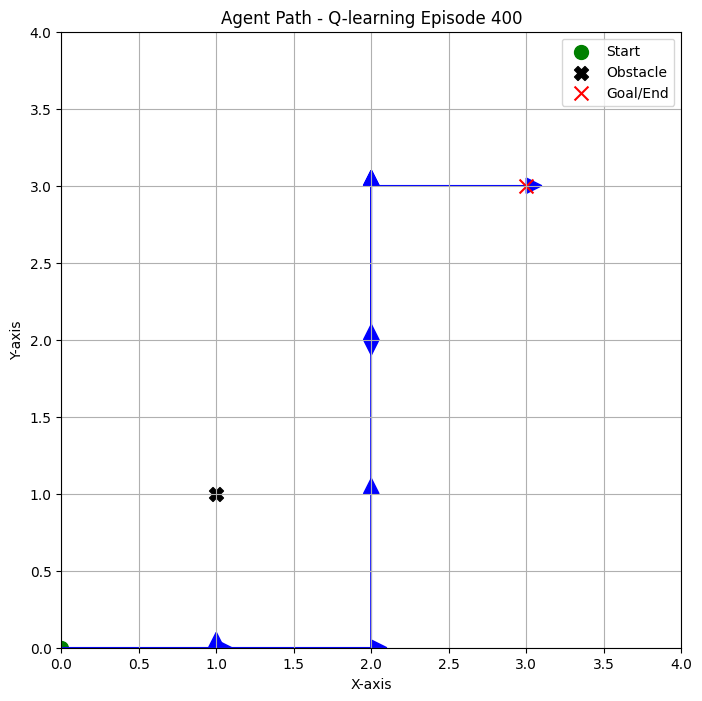

Episode: 400, Avg. Reward: 17.04, Epsilon: 0.6701859060067403


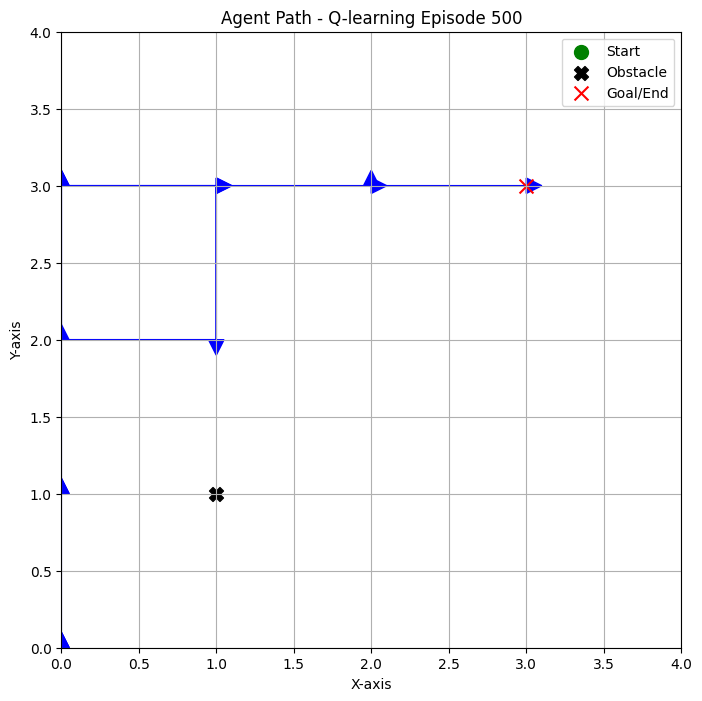

Episode: 500, Avg. Reward: 20.24, Epsilon: 0.6063789448611848


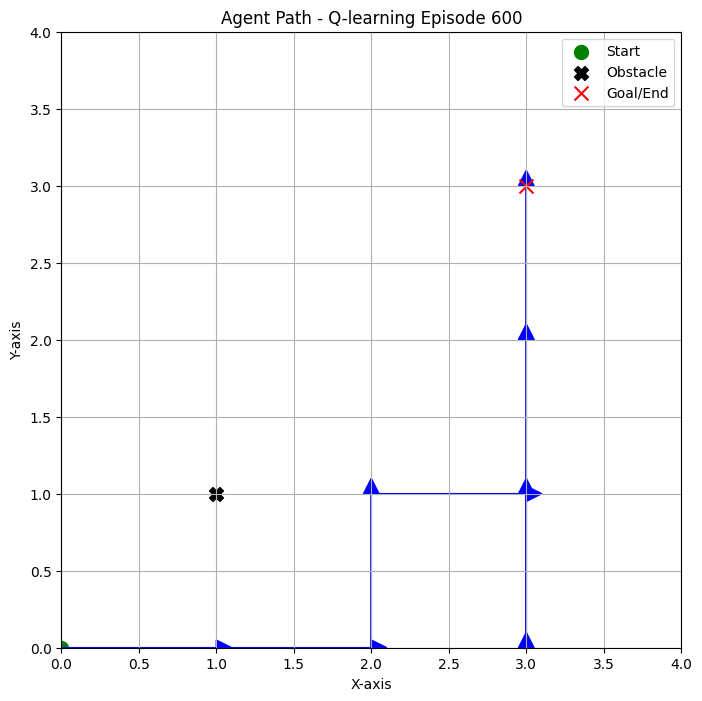

Episode: 600, Avg. Reward: 25.44, Epsilon: 0.5486469074854965


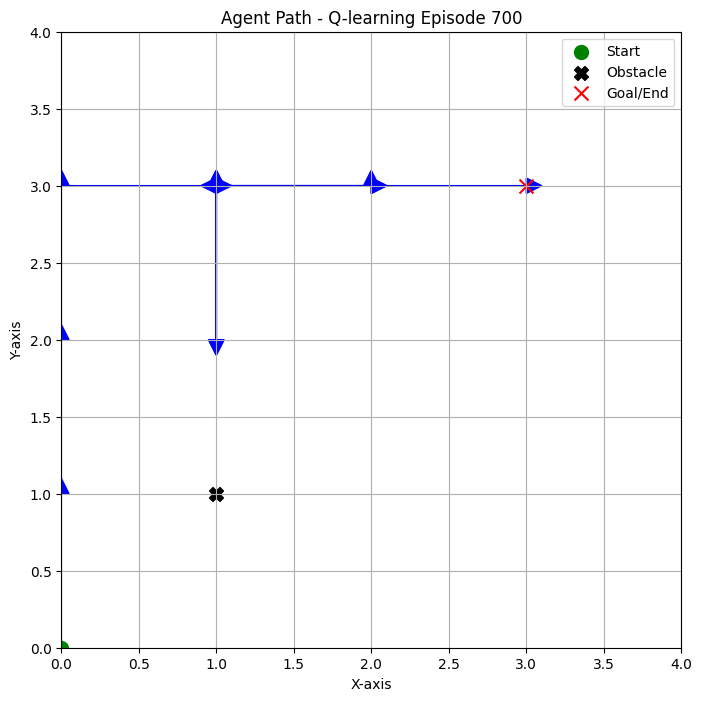

Episode: 700, Avg. Reward: 28.86, Epsilon: 0.4964114134310989


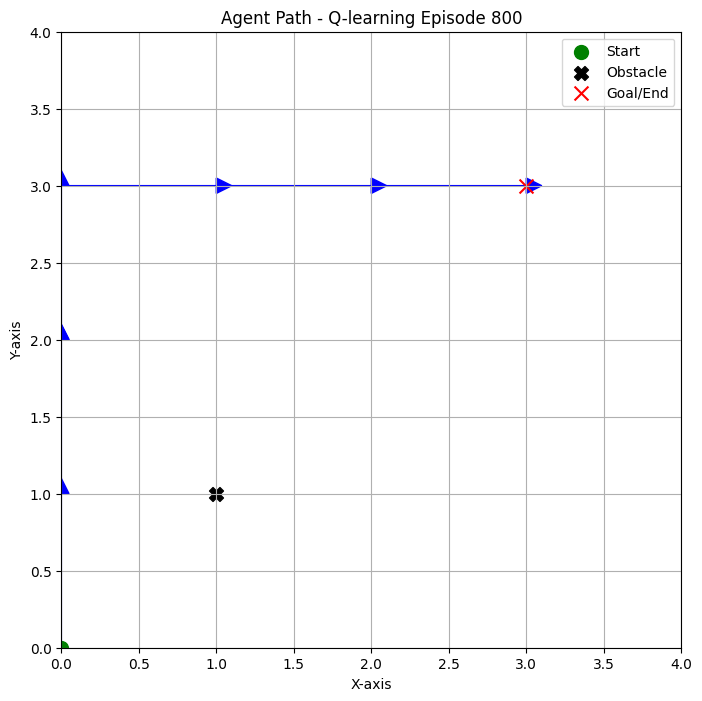

Episode: 800, Avg. Reward: 30.64, Epsilon: 0.4491491486100748


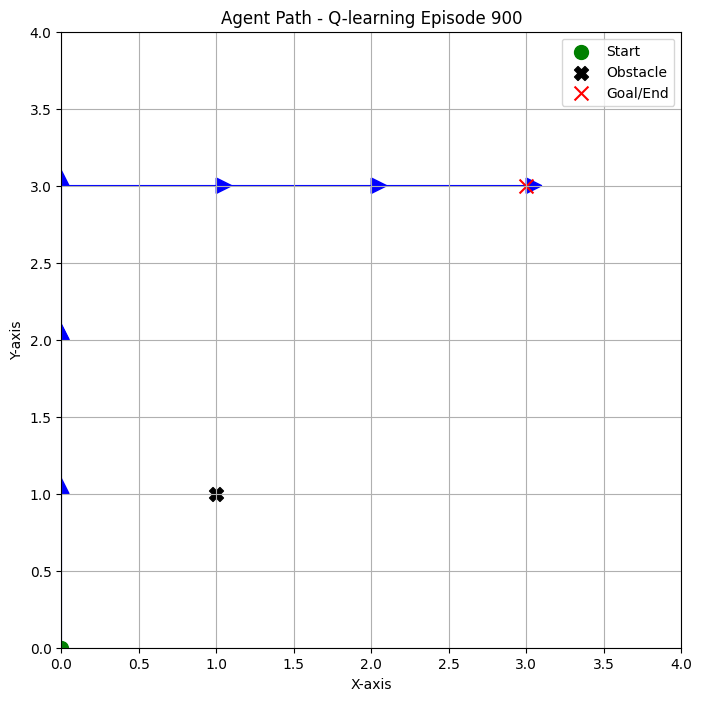

Episode: 900, Avg. Reward: 32.46, Epsilon: 0.4063866225452039


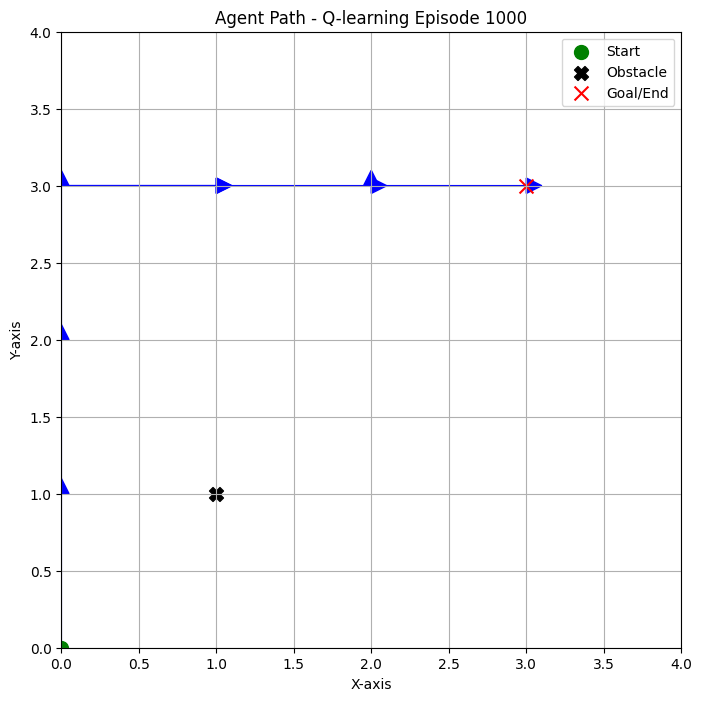

Episode: 1000, Avg. Reward: 32.36, Epsilon: 0.3676954247709635


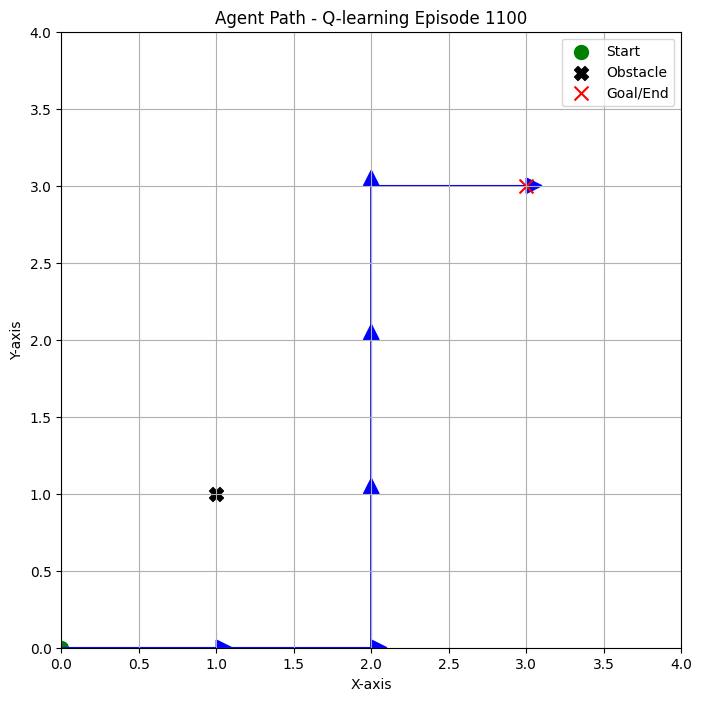

Episode: 1100, Avg. Reward: 34.4, Epsilon: 0.33268793286240766


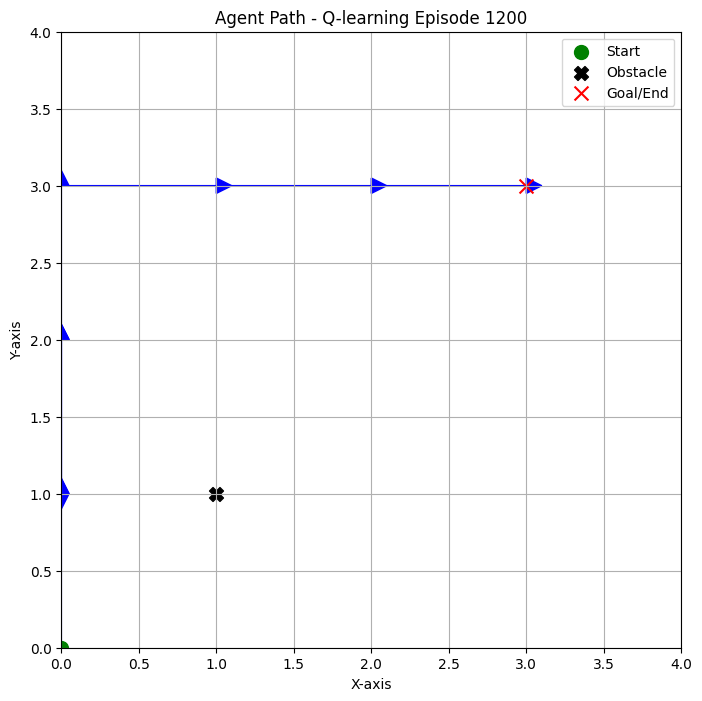

Episode: 1200, Avg. Reward: 34.4, Epsilon: 0.3010134290933992


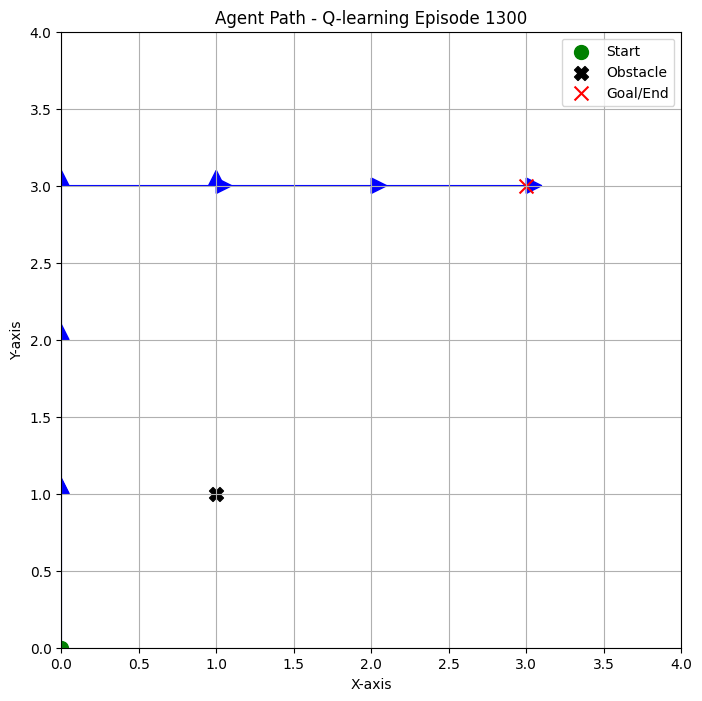

Episode: 1300, Avg. Reward: 35.14, Epsilon: 0.27235458681947705


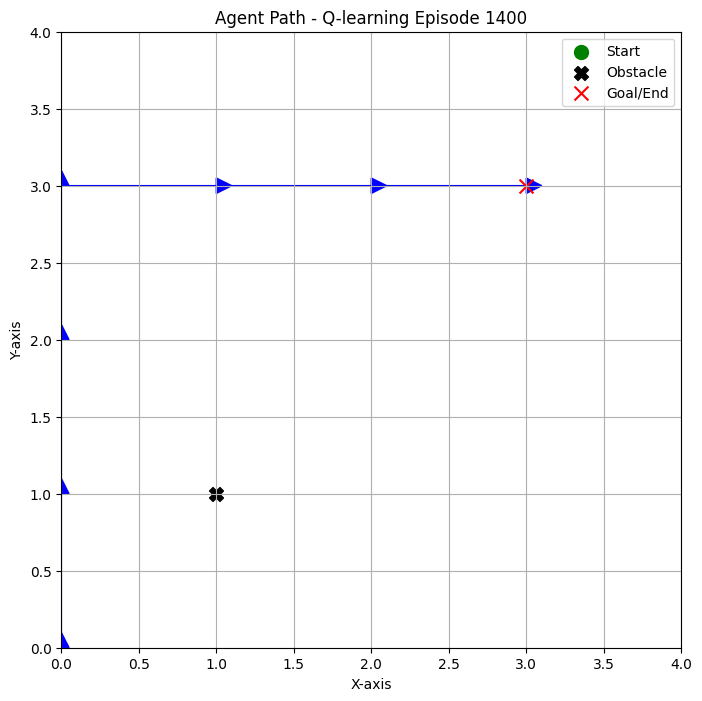

Episode: 1400, Avg. Reward: 36.48, Epsilon: 0.24642429138466176


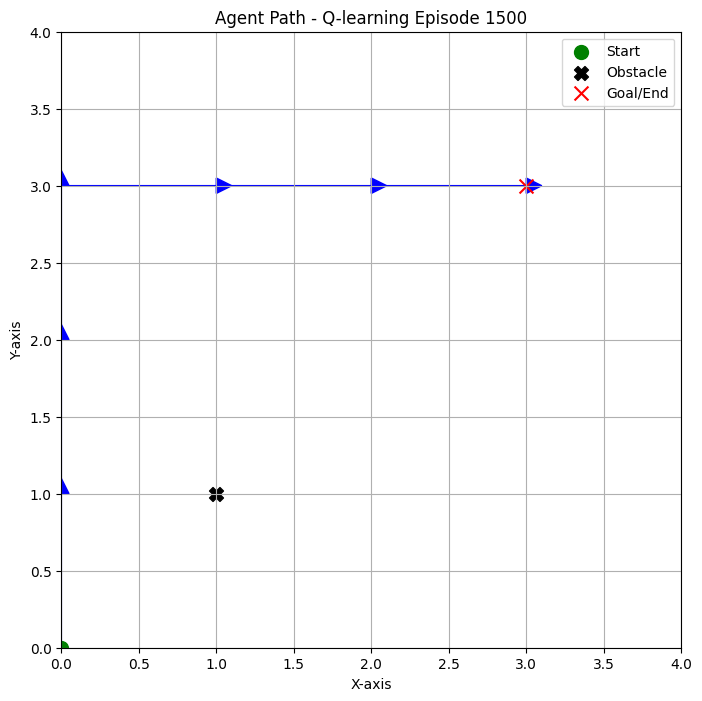

Episode: 1500, Avg. Reward: 37.1, Epsilon: 0.22296276370290227


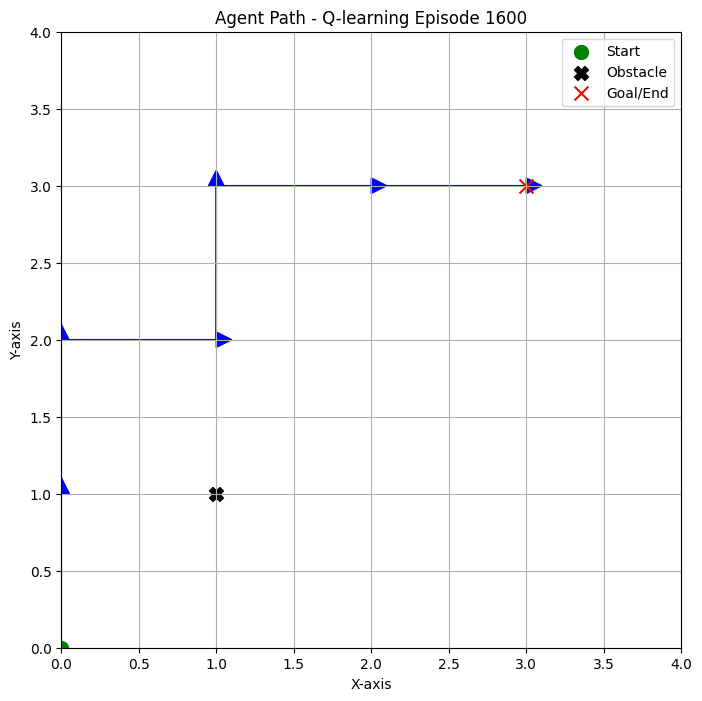

Episode: 1600, Avg. Reward: 37.4, Epsilon: 0.20173495769715546


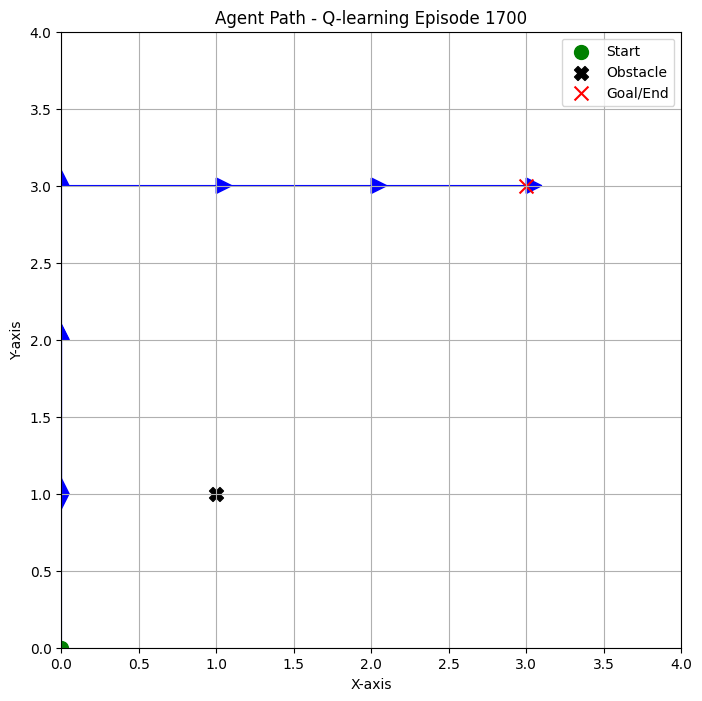

Episode: 1700, Avg. Reward: 37.94, Epsilon: 0.18252820552270246


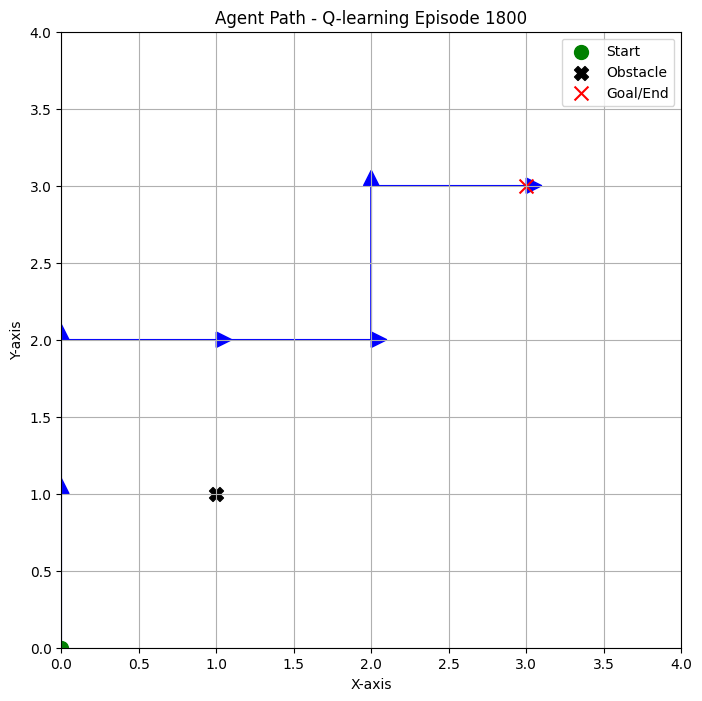

Episode: 1800, Avg. Reward: 37.12, Epsilon: 0.1651500869836984


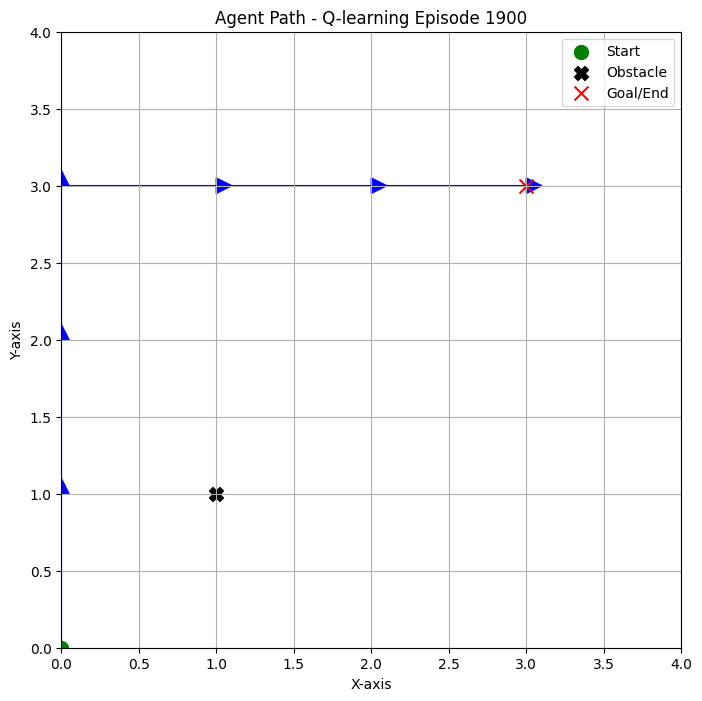

Episode: 1900, Avg. Reward: 37.76, Epsilon: 0.14942650179799613


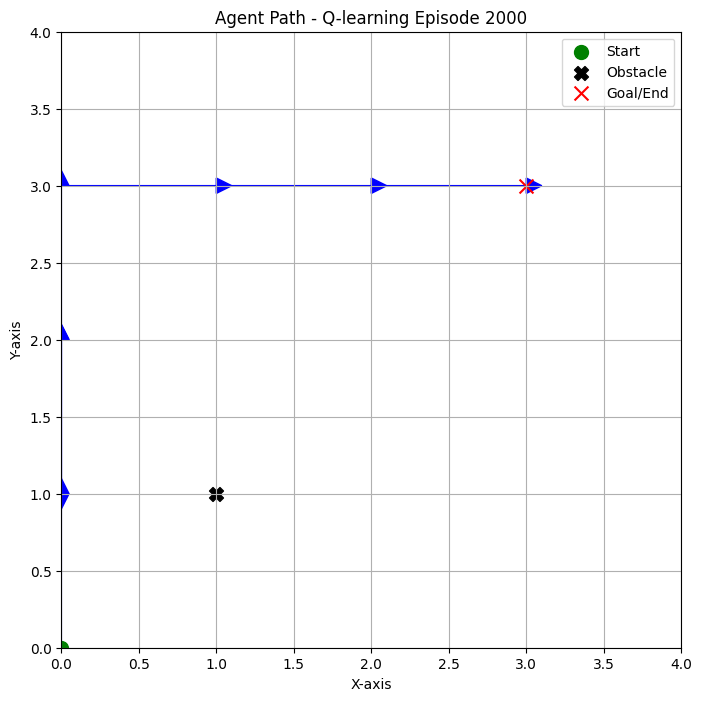

Episode: 2000, Avg. Reward: 38.38, Epsilon: 0.1351999253974994


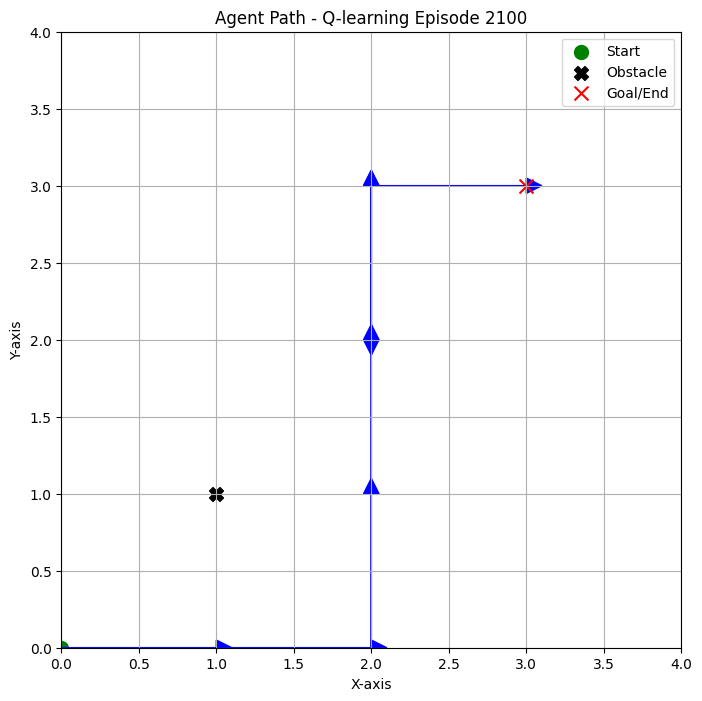

Episode: 2100, Avg. Reward: 38.7, Epsilon: 0.12232783079001676


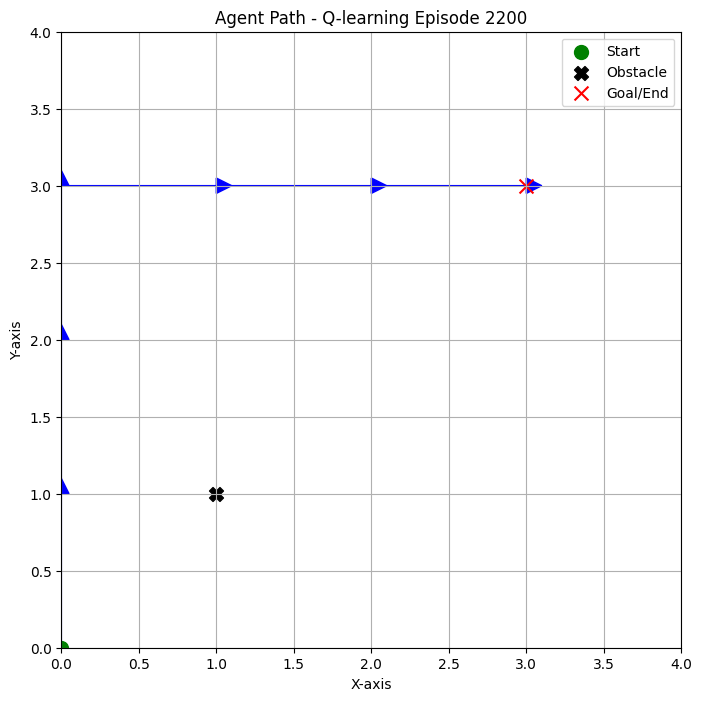

Episode: 2200, Avg. Reward: 38.64, Epsilon: 0.11068126067226178


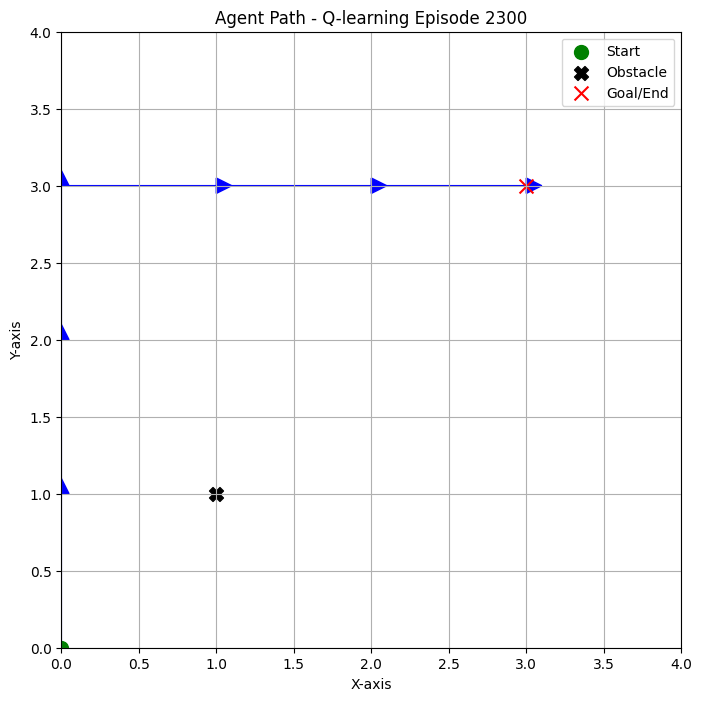

Episode: 2300, Avg. Reward: 38.74, Epsilon: 0.10014353548890782


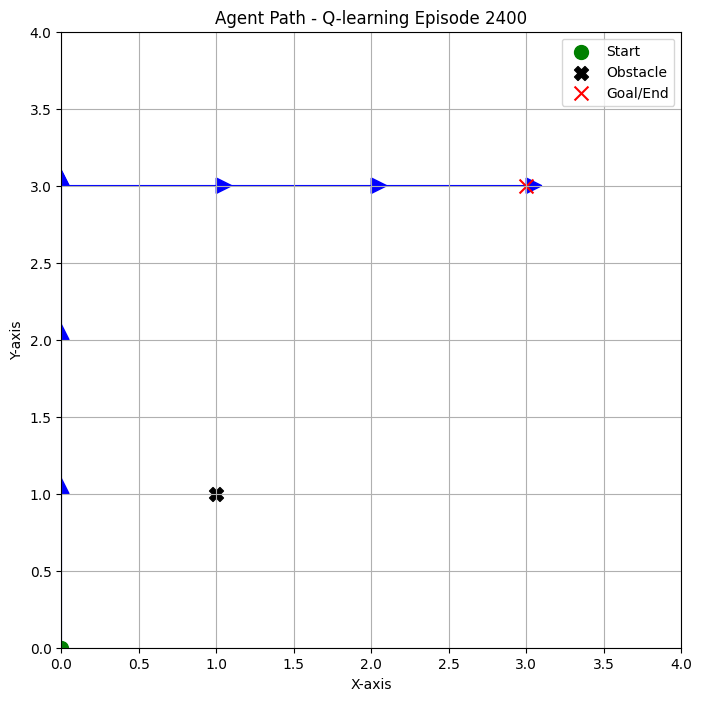

Episode: 2400, Avg. Reward: 38.8, Epsilon: 0.1


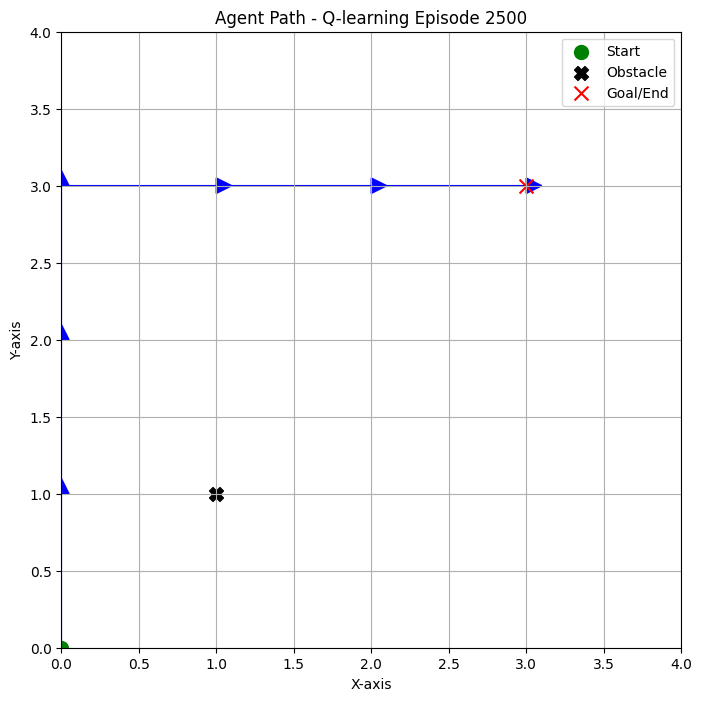

Episode: 2500, Avg. Reward: 38.82, Epsilon: 0.1


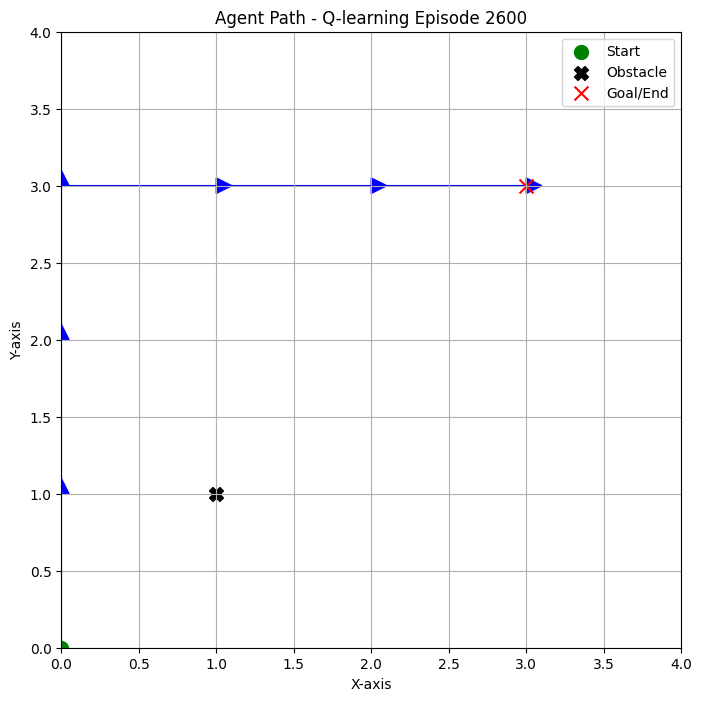

Episode: 2600, Avg. Reward: 38.7, Epsilon: 0.1


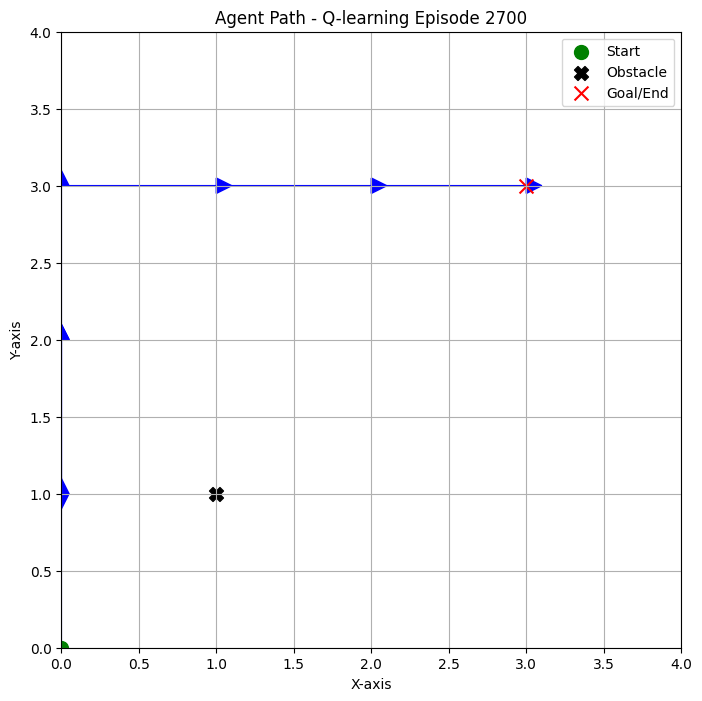

Episode: 2700, Avg. Reward: 38.06, Epsilon: 0.1


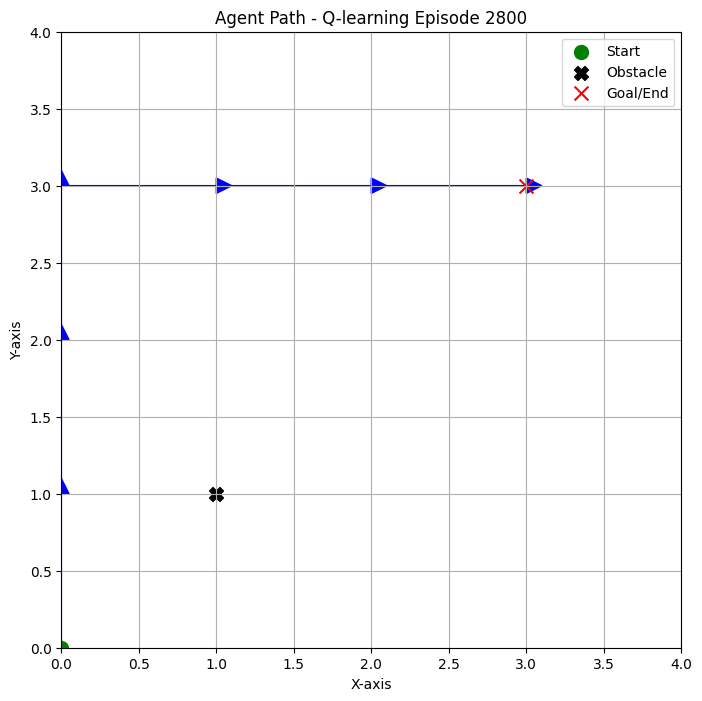

Episode: 2800, Avg. Reward: 38.82, Epsilon: 0.1


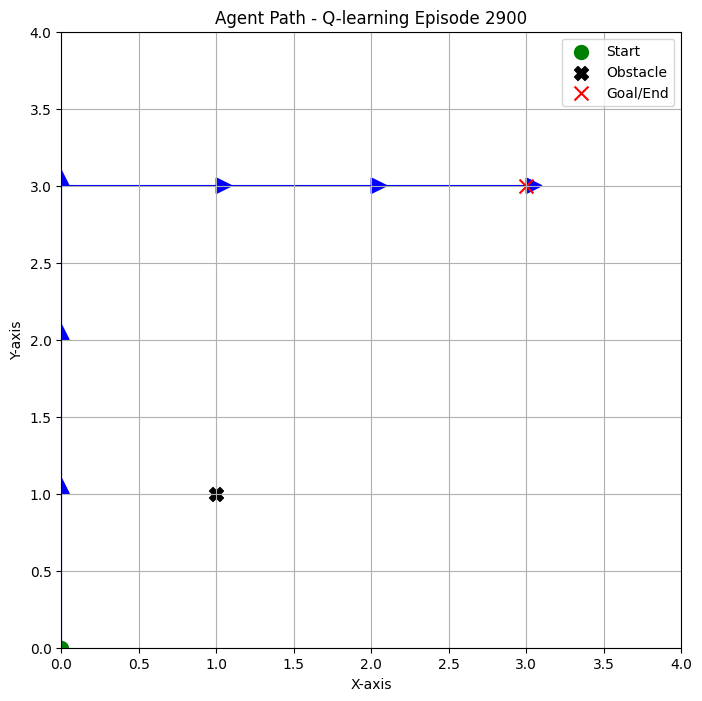

Episode: 2900, Avg. Reward: 38.6, Epsilon: 0.1


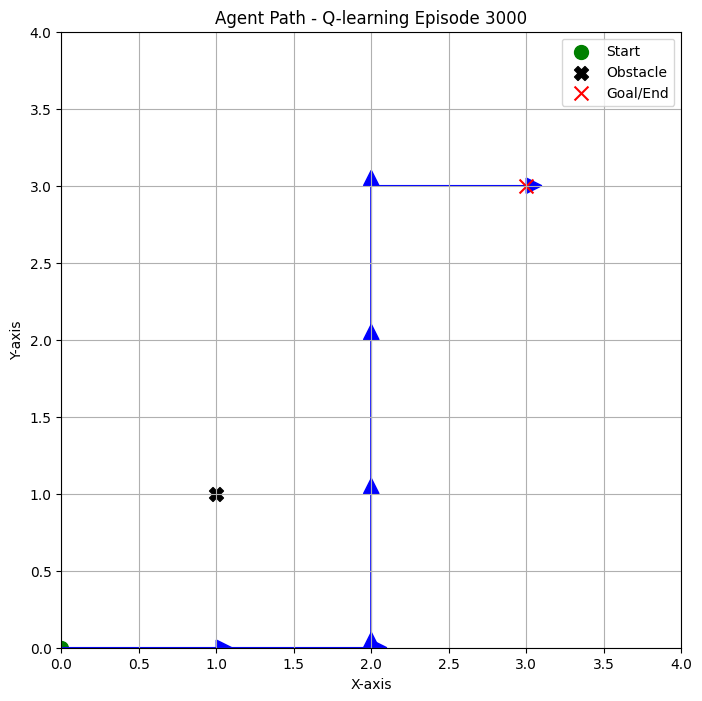

Episode: 3000, Avg. Reward: 38.72, Epsilon: 0.1


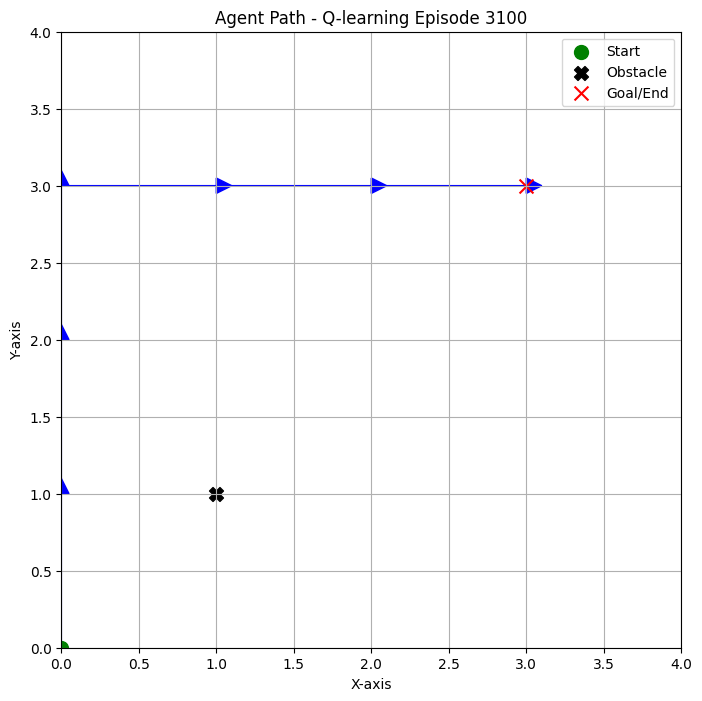

Episode: 3100, Avg. Reward: 39.02, Epsilon: 0.1


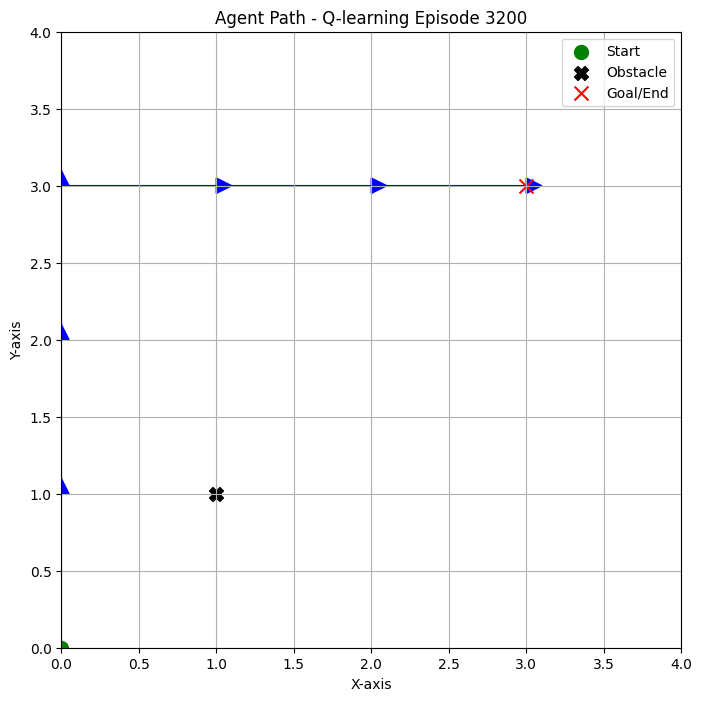

Episode: 3200, Avg. Reward: 38.88, Epsilon: 0.1


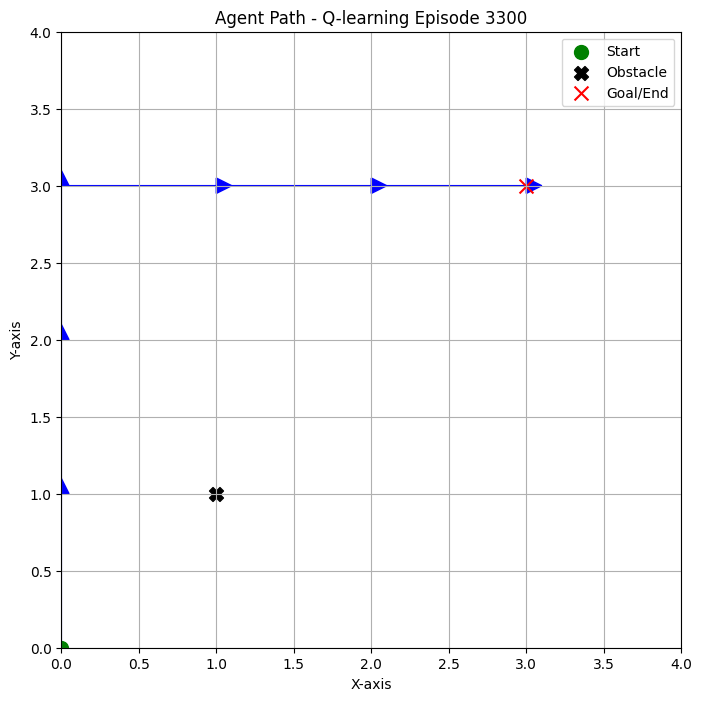

Episode: 3300, Avg. Reward: 38.8, Epsilon: 0.1


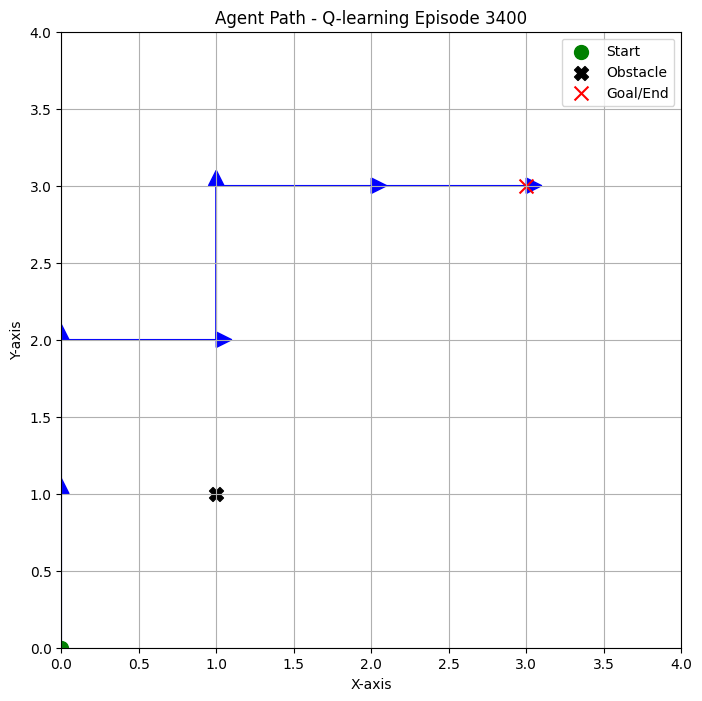

Episode: 3400, Avg. Reward: 38.48, Epsilon: 0.1


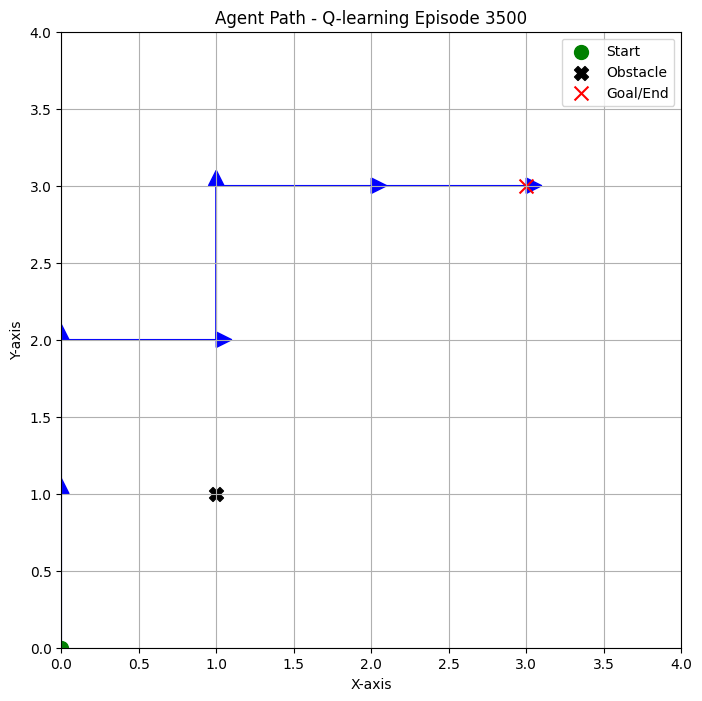

Episode: 3500, Avg. Reward: 38.78, Epsilon: 0.1


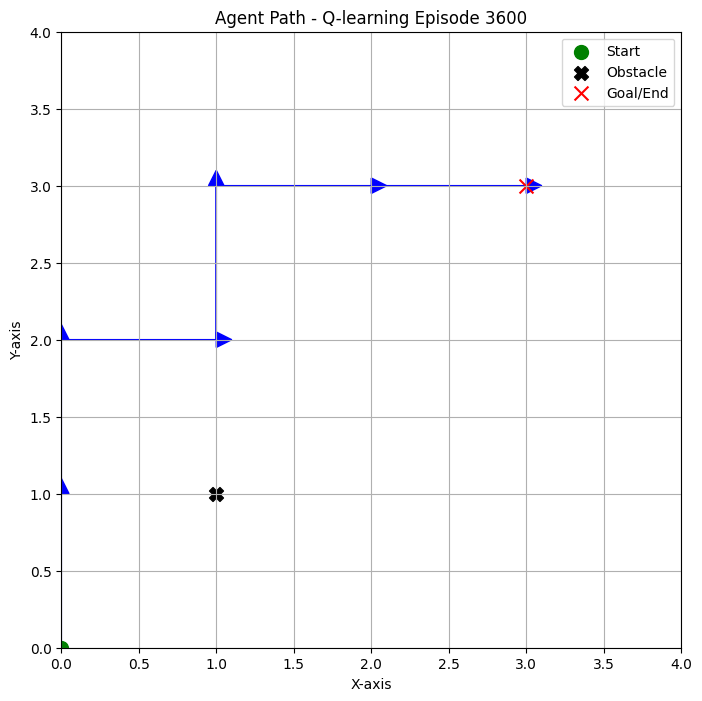

Episode: 3600, Avg. Reward: 38.94, Epsilon: 0.1


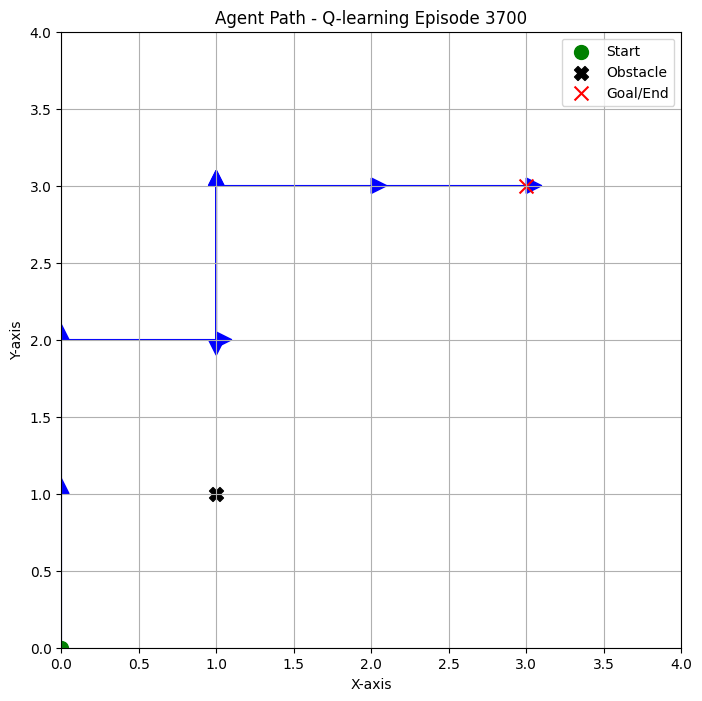

Episode: 3700, Avg. Reward: 39.0, Epsilon: 0.1


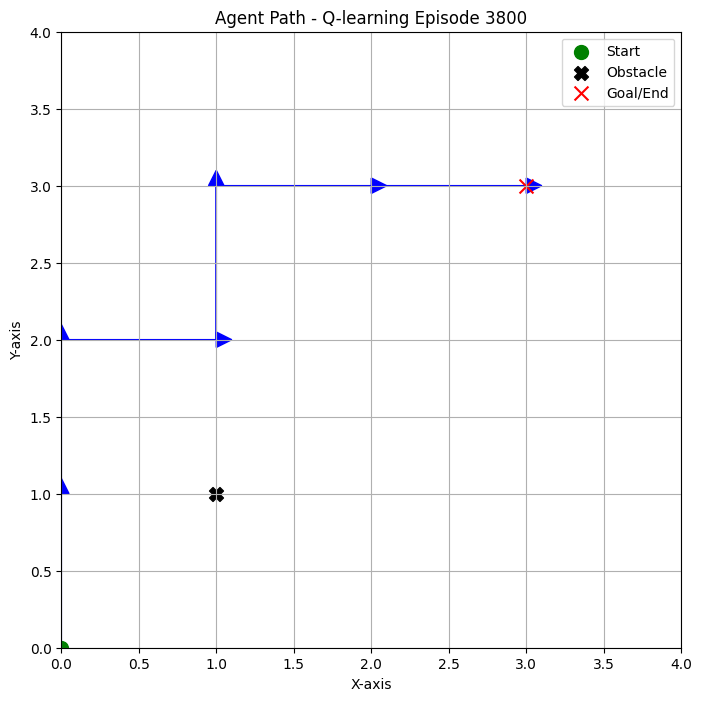

Episode: 3800, Avg. Reward: 38.56, Epsilon: 0.1


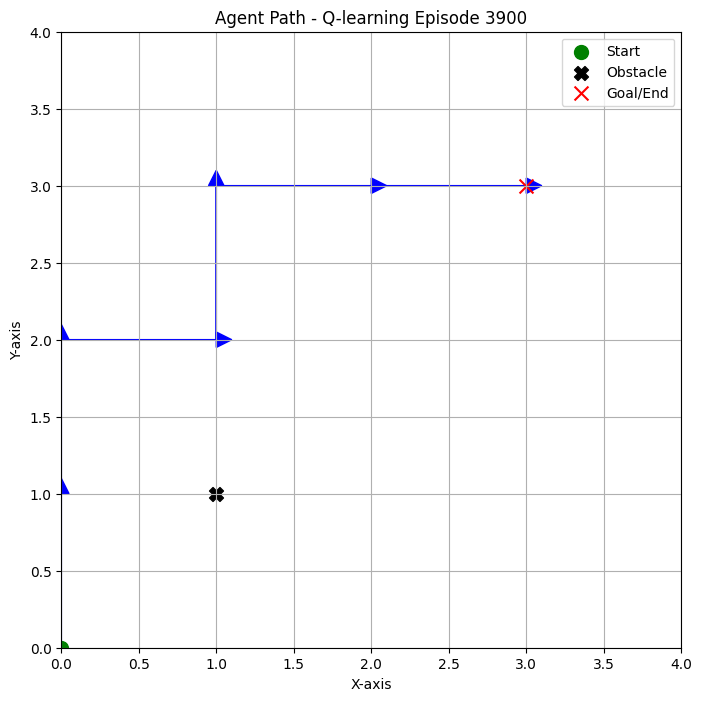

Episode: 3900, Avg. Reward: 38.88, Epsilon: 0.1


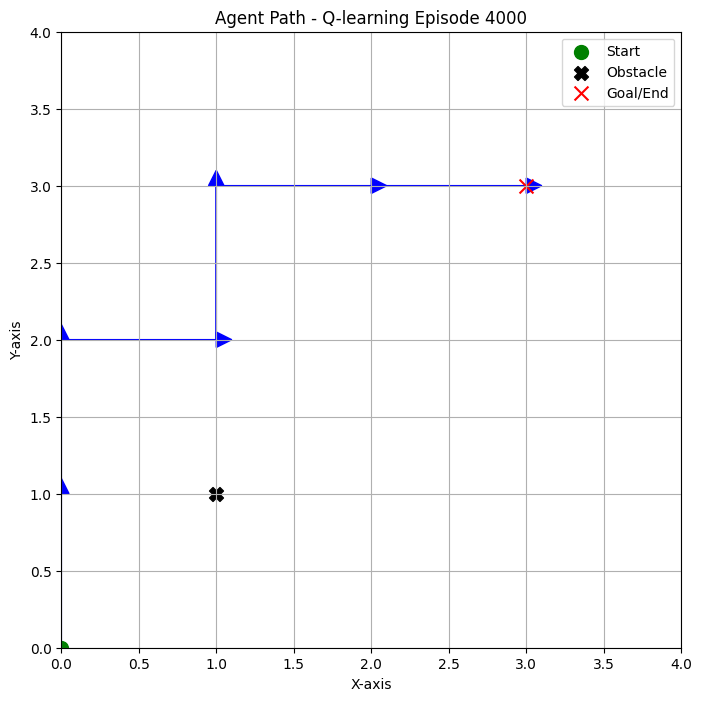

Episode: 4000, Avg. Reward: 38.74, Epsilon: 0.1


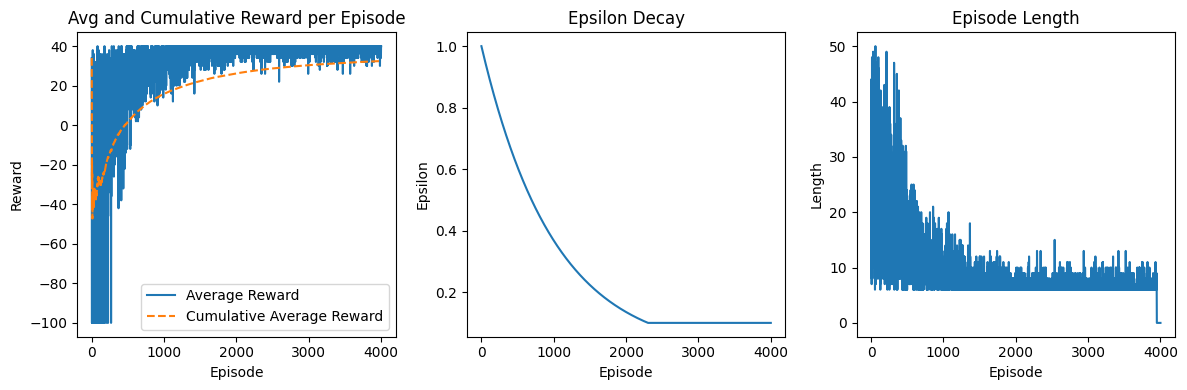

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the environment
class CustomEnvironment:
    def __init__(self):
        self.grid_size = 4
        self.obstacle_pos = (1, 1)  # Obstacle position

        self.state = (0, 0)  # Initial state
        self.goal = (3, 3)   # Goal state

        self.state_history = []  # To store the agent's path

    def reset(self):
        self.state = (0, 0)
        self.state_history = []  # Clear state history
        return self.state

    def step(self, action):
        x, y = self.state

        if action == 0:  # Move right
            x = min(x + 1, self.grid_size - 1)
        elif action == 1:  # Move left
            x = max(x - 1, 0)
        elif action == 2:  # Move up
            y = min(y + 1, self.grid_size - 1)
        elif action == 3:  # Move down
            y = max(y - 1, 0)

        # Check for obstacle
        if (x, y) == self.obstacle_pos:
            x, y = self.state

        self.state = (x, y)
        self.state_history.append(self.state)  # Add current state to history

        # Check if reached the goal
        done = (x, y) == self.goal or len(self.state_history) == 150 or (x, y) == self.obstacle_pos

        # Calculate reward
        if self.state == self.goal:
            reward = 50
            done = True
        elif self.state == self.obstacle_pos:
            reward = -20
            done = True
        else:
            reward = -2
            done = False

        return np.array(self.state), reward, done



class QLearningAgent:
    def __init__(self, action_space_size, learning_rate=0.1, discount_factor=0.99, epsilon_start=1.0, epsilon_decay=0.999,
                 epsilon_min=0.1):
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        # Initialize Q-values table
        self.q_values = np.zeros((4, 4, action_space_size))

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space_size)
        else:
            return np.argmax(self.q_values[state[0], state[1]])

    def update_q_values(self, state, action, reward, next_state, done):
        current_q_value = self.q_values[state[0], state[1], action]

        if done:
            target = reward
        else:
            max_next_q_value = np.max(self.q_values[next_state[0], next_state[1]])
            target = reward + self.discount_factor * max_next_q_value

        # Update Q-value using the Q-learning update rule
        self.q_values[state[0], state[1], action] += self.learning_rate * (target - current_q_value)

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            self.epsilon = max(self.epsilon, self.epsilon_min)

def train_q_learning():
    env = CustomEnvironment()
    agent = QLearningAgent(action_space_size=4)

    num_episodes = 4000
    max_steps = 50

    avg_rewards = []
    epsilons = []
    episode_lengths = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_values(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward

            if done:
                episode_lengths.append(step + 1)
                break

        avg_rewards.append(total_reward)
        epsilons.append(agent.epsilon)
        agent.decay_epsilon()

        if (episode + 1) % 100 == 0:
            visualize_agent_path_qlearning(agent, env, episode + 1)

        if (episode + 1) % 100 == 0:
            print(f"Episode: {episode + 1}, Avg. Reward: {np.mean(avg_rewards[-100:])}, Epsilon: {agent.epsilon}")

    # Ensure episode_lengths has the same length as num_episodes
    episode_lengths.extend([0] * (num_episodes - len(episode_lengths)))

    plot_results(num_episodes, avg_rewards, epsilons, episode_lengths)

# Helper function to visualize the agent's path for Q-learning
def visualize_agent_path_qlearning(agent, env, episode):
    plt.figure(figsize=(8, 8))
    plt.title(f'Agent Path - Q-learning Episode {episode}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    state = env.reset()
    plt.scatter(state[0], state[1], color='green', marker='o', s=100, label='Start')

    for step in range(50):  # Assuming max_steps is 50
        action = agent.select_action(state)
        next_state, _, done = env.step(action)

        plt.arrow(
            state[0], state[1],  # Center the arrow in the grid cell
            next_state[0] - state[0], next_state[1] - state[1],
            head_width=0.1, head_length=0.1, fc='blue', ec='blue'
        )
        state = next_state

        if done:
            break

    # Check if there is an obstacle before plotting
    if env.obstacle_pos is not None:
        obstacle_marker = 'X'
        obstacle_color = 'black'
        plt.scatter(env.obstacle_pos[0], env.obstacle_pos[1], color=obstacle_color, marker=obstacle_marker, s=100,
                    label='Obstacle')

    # Add marker for the goal or end
    if done and not np.any(state == env.goal):
        goal_marker = 's'  # square for non-goal end
        goal_color = 'orange'  # a different color
    else:
        goal_marker = 'x'
        goal_color = 'red'

    plt.scatter(state[0], state[1], color=goal_color, marker=goal_marker, s=100, label='Goal/End')

    # Add a marker for the end position when the episode is done but not at the goal
    if done and not np.any(state == env.goal):
        plt.scatter(state[0], state[1], color='black', marker='X', s=100, label='End (Max Steps)')

    plt.legend()
    plt.grid(True)

    # Set axis limits to ensure a fixed grid size
    plt.xlim(0, env.grid_size)
    plt.ylim(0, env.grid_size)
    plt.show()

# Helper function to plot the results for Q-learning
def plot_results(num_episodes, avg_rewards, epsilons, episode_lengths):
    # Calculate cumulative average rewards
    cum_avg_rewards = [sum(avg_rewards[:i+1]) / (i+1) for i in range(num_episodes)]

    # Average Reward Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)

    # Plot Average Reward per Episode
    plt.plot(range(1, num_episodes + 1), avg_rewards, label='Average Reward')

    # Plot Cumulative Average Reward
    plt.plot(range(1, num_episodes + 1), cum_avg_rewards, label='Cumulative Average Reward', linestyle='--')

    plt.legend()  # Show legend to differentiate between the two lines
    plt.title('Avg and Cumulative Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')

    # Epsilon Decay Plot
    plt.subplot(1, 3, 2)
    plt.plot(range(1, num_episodes + 1), epsilons)
    plt.title('Epsilon Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')

    # Episode Length Plot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, num_episodes + 1), episode_lengths)
    plt.title('Episode Length')
    plt.xlabel('Episode')
    plt.ylabel('Length')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    train_q_learning()